## Data Science project

The normal procedure to follow is 

- `Step 1`  we have to collect the data. 

Then, to start working on the project in Python 


- `Step 2` we import the neccessary libraries 


- `Step 3` Then we load our data from storage device to python environment 


- `Step 4` *EDA - Exploratory Data Analysis* where we **clean the data**, **remove nulls**, **remove duplicates**, **Outliers** ( All **descriptive stats**)

  - Visualize the data - matplotlib and seaborn 


- `Step 5` *Feature Engineering* - (if necessary - mainly for categorical data **recheck this if needed edit the information**) 

     - - Label encoding
     - - One hot encoding
     
     - Or **Transformation** of the data if required



- `Step 6` *Feature selection* - x(independent features), y(target/dependent) -> train, test - x_train, y_train, x_test, y_test  **Multicollinearity** **VIF** we are using in this

  - VIF
  - Correlation
  - PCA etc


- `Step 7` Model creations


- `Step 8` Model evolution (verify model accuracy)


- `Step 9` Tuning the model


- `Step 8` Save the data


NOTE - Depending on the client's requirement (problem statement) we see if **Accuracy** is more important or **Time complexcity** (TC)  eg for TC is face recognition, for Accuracy [we wait for money transactions The page we get to wait for 30 secs and we do]

##### In **real world** your team or you are given the dataset which you have to understand in a few days or a week (This step is important)

### Lets start with a basic linear regression project for now. 

`*Regression*` - It is a Supervised learning approach used to predict continuous numerical values based on the 
independent input variables using regression algorithms. (mainly plots a best-fit line or a curve between the data)

*First Alogrithm* - **LINEAR REGRESSION** 

- Defination -->

- When to use -->

- How to check for the accuracy -->

- - **Strengths/Advantages of Linear Regression**

- - - *Predictable and easy to interpret* - Regressions are easy to interpret because they describe simple mathematical equations, which we can often graph.
        Other complex models use black box calculation (i.e we cannot know how they may behave with certain inputs or how calculations are working)
    
- - - *Easy to extrapolate* - 

- - - *Optimal fitting is usually guaranteed* - Mainly ML models use gradient descent(gd), tuning gd doesnot provide any guarantee for optimal solution.
       whereas Regression models uses sum of squares as a cost function doesn't actually need an iterative gradient-descent procedure. Instead to calculate the optimal location for the line we use maths here.
    As long as the sample size isn't too large linear regression doesn't need special attention to be paid to the fitting process, and the optimal solution is guaranteed.

**Assumptions of Linear Regression**


i) The term “linear” in linear regression refers to the fact that the method models data with *linear combination* of the explanatory/predictor/independent variables (attributes). Linear regression models assume that the relationship between a dependent continuous variable Y and one or more explanatory (independent) variables X is linear (that is, a straight line).

ii) The model expects features to be independent. When model assumptions aren't true, the model can make misleading predictions.

**Scaling**

Scaling doesn’t impact your model for Simple Linear Regression. 
However, it may impact the feature selection as the co efficients value will be different based on the units the feature
is using but the feature selection will only happen based on number ( the units are not considered). Hence scaling must be performed.

In [4]:
import numpy as np # numpy is used for mathematical operation Numpy performs function in parallel and are in memory operations so they are fast for huge data
import pandas as pd # for manipulating the data 
import matplotlib.pyplot as plt # for visualization of the data.
import os

In [5]:
# you can check and change the directory if you are working in a different path

os.getcwd()

'C:\\Users\\SWATI'

In [8]:
os.chdir('C:\\Users\SWATI\Downloads\machine learning')

In [9]:
#checking the path for the available files their
os.listdir()

['.ipynb_checkpoints',
 '20-08_Linear Regression Handson (1).ipynb',
 '26-08_Logistic Regression Handson (1).ipynb',
 'bank-additional-full-1 (2).csv',
 'Decision_Tree_case_study=Harsh.ipynb',
 'Decision_Tree_case_study_(5)_(1)_(1).ipynb',
 'heart-1.csv',
 'new_insurance_data.csv']

In [10]:
# load the structured data or tabular data or csv 

Insurance_df = pd.read_csv("new_insurance_data.csv")

In [11]:
Insurance_df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


##### if you want you can make a note of what every feature/column mean here. (to better understand your dataset)

In [13]:
Insurance_df.shape # to find the size of the dataset here we have 1338 rows and 13 columns

(1338, 13)

i) `shape` - can be used directly on dataframe 

In [14]:
# we can also use info to check on the basic information of the data 

Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [15]:
Insurance_df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [16]:
# we can see that 9 of the features/columns have null values in it.

So, to deal with **null values** we can 

 - drop the null values  `*dropna()*`
 - impute the null values (mean, median and mode mainly)  `*fillna()*`
 - Again impute the null values (but here we keep track of the values we have changed)

In [18]:
Insurance_df['smoker'].mode() # as somker is catagorial data 0 - for no smoking 1- somking

0    no
Name: smoker, dtype: object

In [19]:
Insurance_df['smoker'].mode()[0]

'no'

In [20]:
cols_list = list(Insurance_df.columns)
cols_list

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [21]:
# for on fill up the missing values 

for i in cols_list:
    
    if Insurance_df[i].dtype == "object":
        
        #categorical
        Insurance_df[i] = Insurance_df[i].fillna(Insurance_df[i].mode()[0])
        
    else :
        Insurance_df[i]= Insurance_df[i].fillna(Insurance_df[i].mean())
        

##### Using fillna or dropna depends on problem statement and the dataset 

-- For now I beleive

- we must use `fillna` when small amount of data is missing ( as in we are not adding too much of new values)
- we can use `dropna` if a large number of data is missing in a columns 
( just check if the cols is important to determine the target value or not) 
if its *not important* we can easily drop as if we fill it we may add too much manipulated data to the dataset.
If it is *important* we try to get the data from client or check the source again before replacing the null values for better result.


In [22]:
# check for the null values again to verify if all cells are filled.

Insurance_df.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

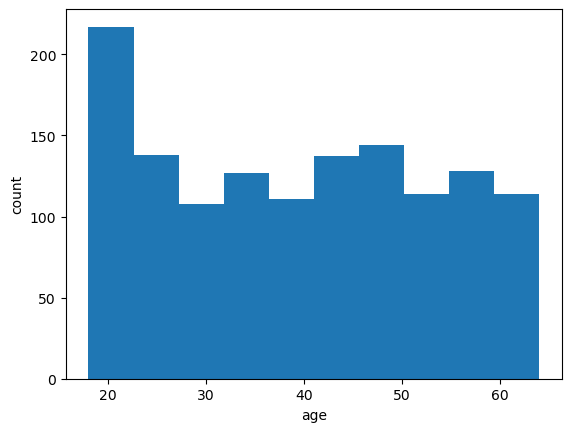

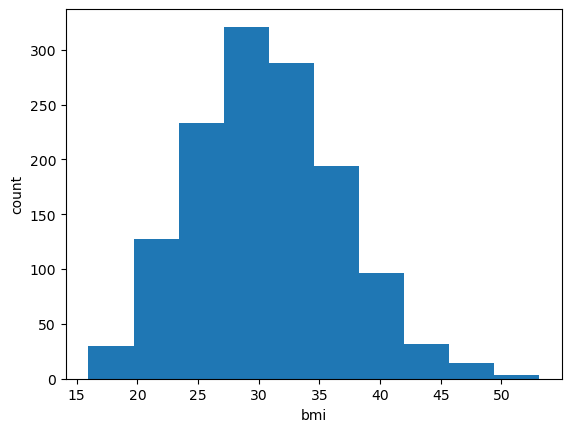

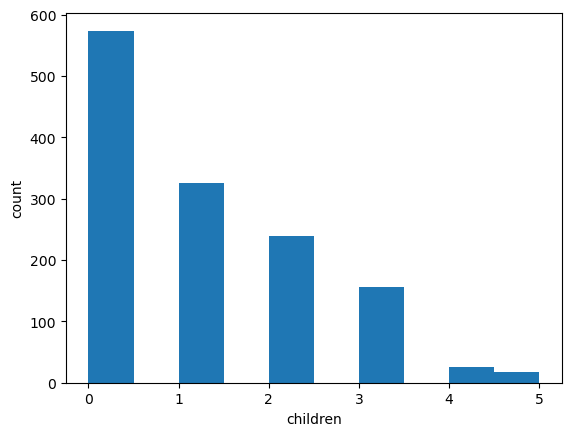

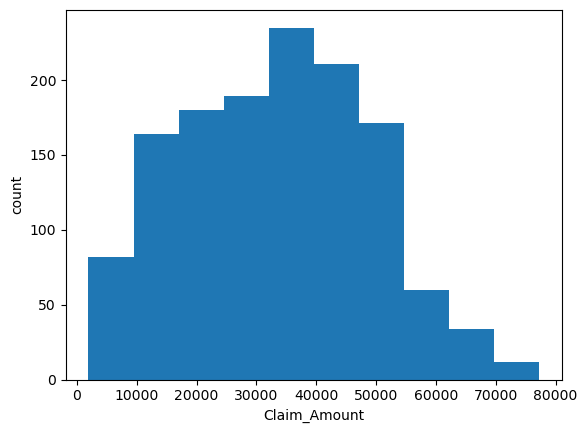

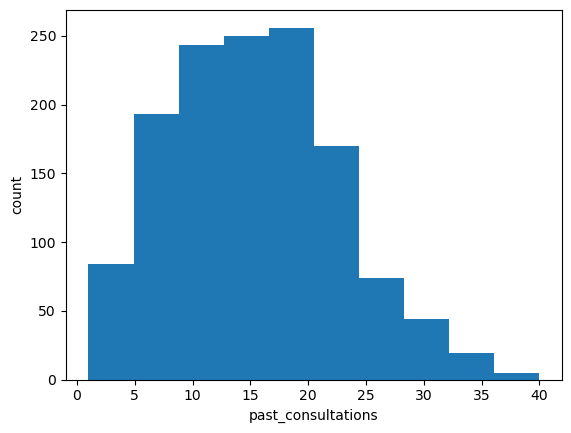

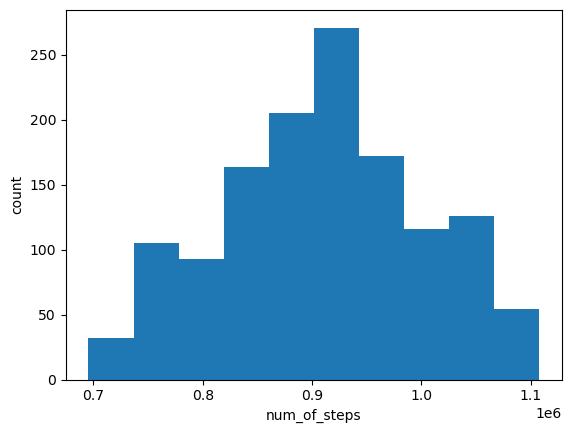

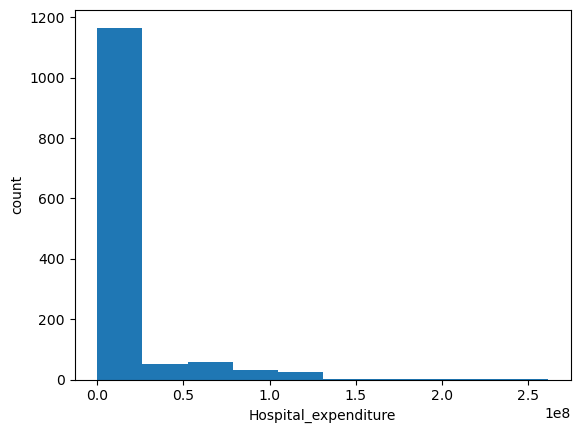

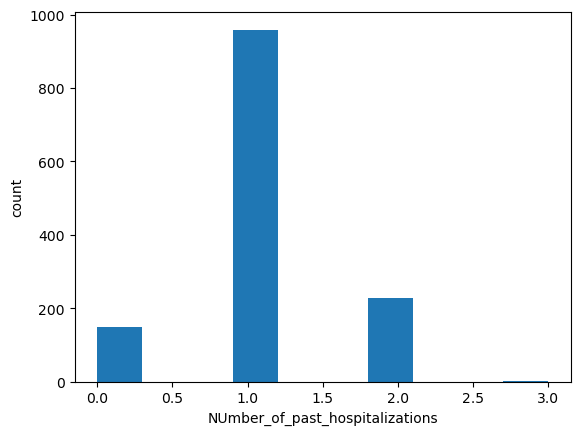

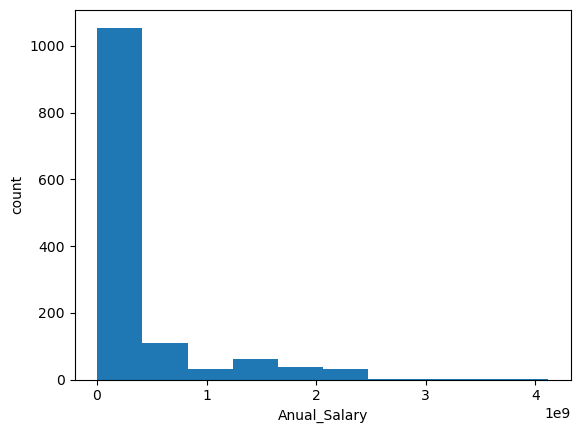

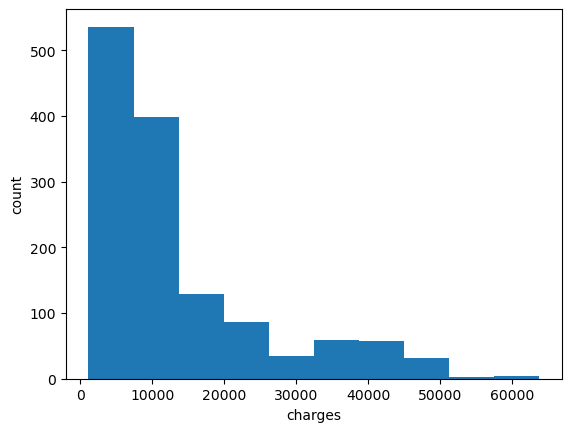

In [24]:
# so we have removed the null values.

# Now, lets check distribution of the features 

# Do remember we can only plot a graph for numerical values

for i in cols_list:
    
    if ((Insurance_df[i].dtype == 'int64') or (Insurance_df[i].dtype == 'float64')):
        plt.hist(Insurance_df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show() # we use this to remove the warning in jupyter notebook.
    

In [25]:
Insurance_df['age'].value_counts() # just to verify with the plot above 

18.000000    69
19.000000    66
50.000000    29
46.000000    29
45.000000    29
52.000000    29
48.000000    29
51.000000    29
47.000000    29
20.000000    28
49.000000    28
54.000000    28
27.000000    28
26.000000    28
24.000000    28
53.000000    28
21.000000    28
28.000000    28
40.000000    27
44.000000    27
43.000000    27
42.000000    27
41.000000    27
23.000000    27
30.000000    27
29.000000    27
25.000000    27
55.000000    26
57.000000    26
34.000000    26
32.000000    26
33.000000    26
31.000000    26
56.000000    26
22.000000    26
59.000000    25
58.000000    25
39.000000    25
38.000000    25
36.000000    25
37.000000    25
35.000000    24
60.000000    23
61.000000    23
62.000000    23
63.000000    23
64.000000    22
39.310008     9
Name: age, dtype: int64

In [26]:
Insurance_df['NUmber_of_past_hospitalizations'].value_counts()

1.000000    957
2.000000    227
0.000000    150
1.060629      2
3.000000      2
Name: NUmber_of_past_hospitalizations, dtype: int64

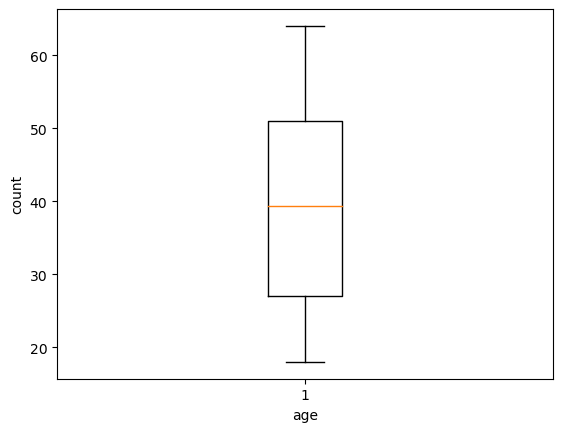

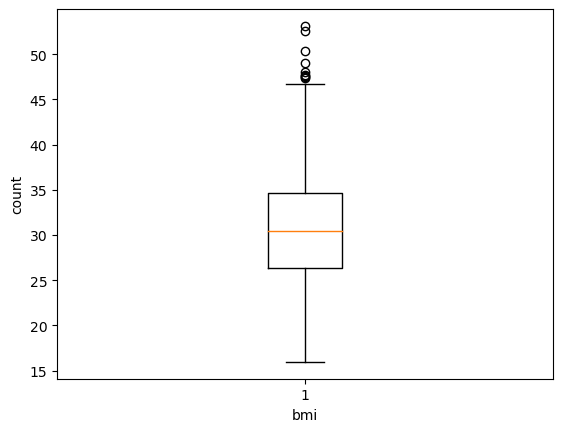

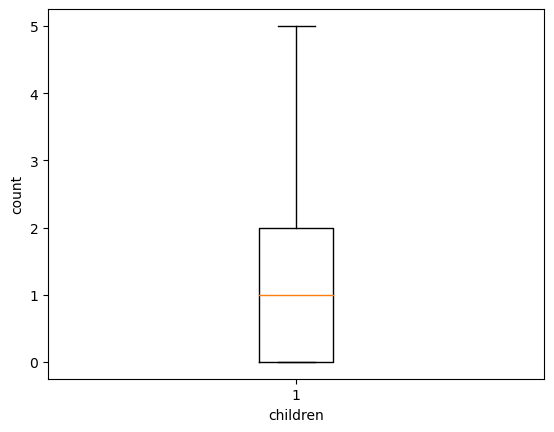

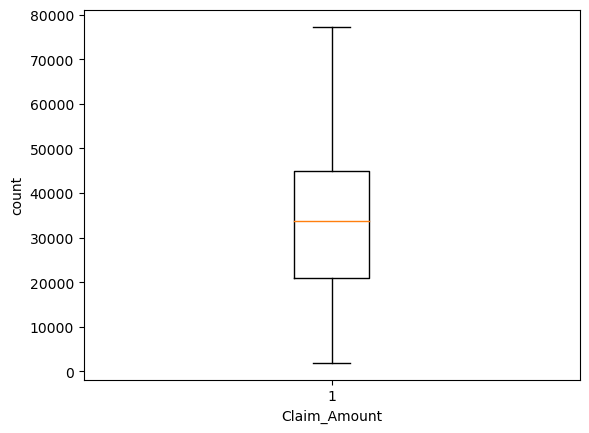

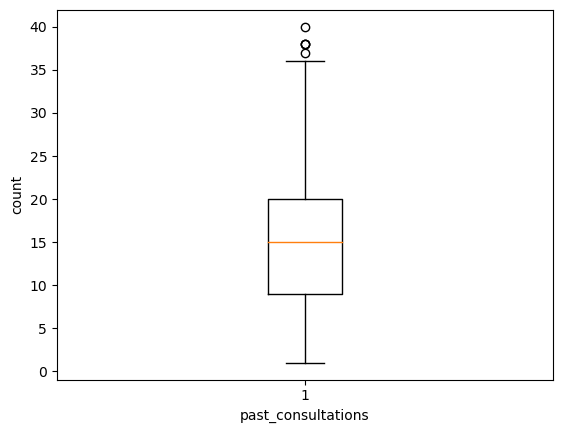

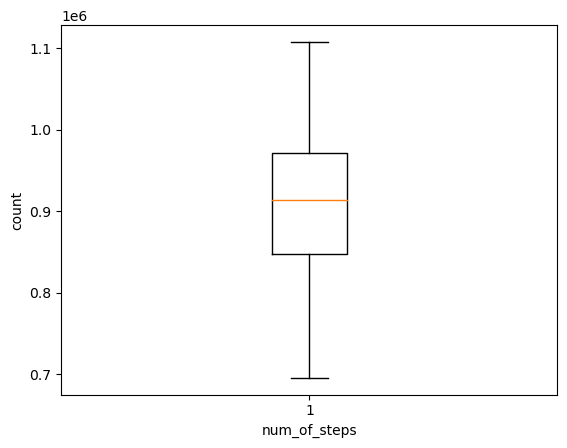

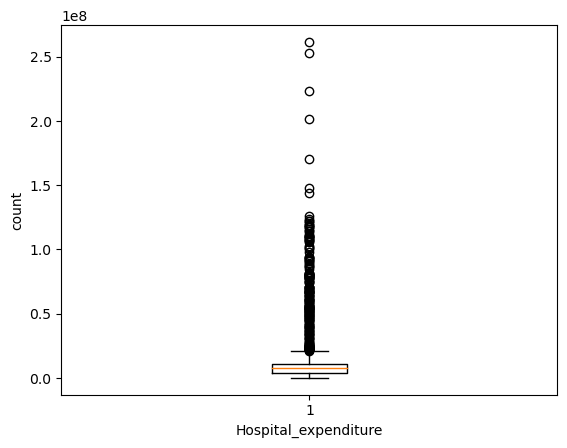

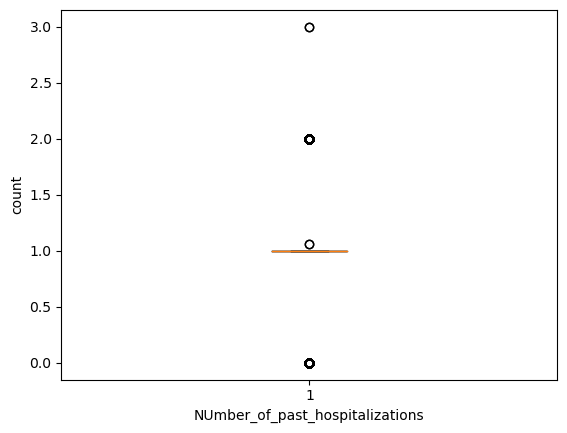

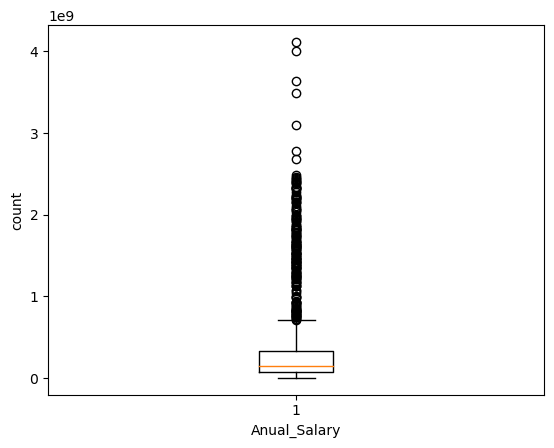

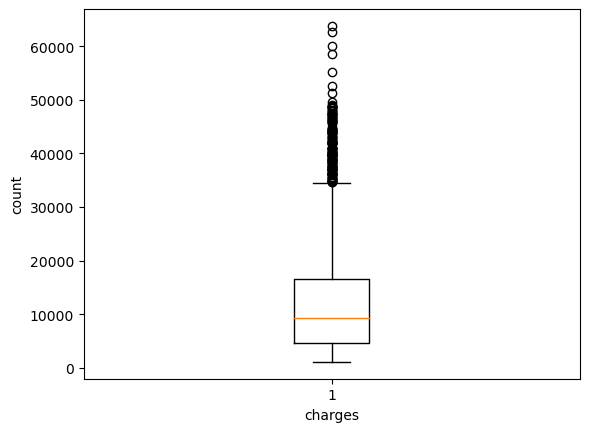

In [28]:
# now lets check for the outliers
# box plot

for i in cols_list:
    
    if((Insurance_df[i].dtype == 'int64') or (Insurance_df[i].dtype == 'float64')):
        plt.boxplot(Insurance_df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show() # without this line it was showing the last graph
        

In [34]:
Insurance_df.describe() # to check for min max and compare with the box plot  

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,13.987500,6.094840,1.199606,15535.307255,7.450948,9.178297e+04,2.665309e+07,0.533184,5.656109e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.310008,30.400000,1.000000,33611.286065,15.000000,9.140155e+05,7.500985e+06,1.000000,1.422756e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.090187e+07,1.000000,3.298713e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


#### now we can see the outlier so, lets start treating it 

`NOTE` don't exclude a outlier if its signify's importance ( they can help us with rare events)
eg: stock market crash - outliers are important is these cases 
    
Now to handle outliers 

 - There are different methods 

     - quantile IQR
     - Z score 
     - **Find the next one**
    
Here we are using `Quantile IQR` method.
IQR = Q3-Q1 IQR

#lower limit is calculated as Q1-1.5*IQR

#Upper limit is calculated as Q3+1.5*IQR

For this dataset

     ->  Q1 = Insurance_df['bmi'].quantile(0.25) 
     ->  Q3 = Insurance_df['bmi'].quantile(0.75)

Insurance_df = Insurance_df[(Insurance_df['bmi']> Q1-1.5IQR) & (Insurance_df['bmi']< Q3+1.5IQR)]

In [39]:
outlier_list_features = ['bmi','past_consultations','Hospital_expenditure', 'Anual_Salary']

for i in outlier_list_features:
    
    Q1 = Insurance_df[i].quantile(0.25) # percentage lower limit
    Q3 = Insurance_df[i].quantile(0.75) # percentage upper limit
    
    IQR = Q3 -Q1
    
    Insurance = Insurance_df[(Insurance_df[i] >= Q1 - 1.5*IQR) & (Insurance_df[i] <= Q3 + 1.5*IQR)]
    # here we are removing the outliers and only considering the part that is covered in the above condition
    


Try to **check** if the percentage of upper and lower limit

In [40]:
Insurance_df.shape

(1338, 13)

In [42]:
Insurance.shape 
# As I have changed the variable you can store it in the original name(dataset) as well

(1146, 13)

In [45]:
1146-1338

-192

In [52]:
# we must check for duplicate values now

Insurance.duplicated().sum()

0

In [53]:
# as we don't have duplicates in this dataset so, we can continue 

# or we may have used drop_duplicates() function to clean the dataset


#### Feature Importance

Linear Regression can be used to get important features by seeing their coefficients after model fitting. 
The highly effecting variables have large coefficients.

*Coefficients*

### Coefficients of the features in linear regression 


- coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(lr.coef_)}).sort_values(by='Coefficients',ascending = False)

- coefficients

#### our EDA is complete now ( try scaling, normalization or standardization later in new *notebook*)

#### Now for Feature selection

Explain - what is Multi-collinearity - VIF (if we have high correlation between independent variables) 
The relation between independent variables specially if high is known as Multi-collinearity. 

---> we have to find such cols and remove it. VIF is used to check Multi-collinearity.

---> we have to drop the columns if its VIF value higher than 6 even if the column it highly related to the target as VIF is given
     priority

Note - Normal correlation we check between dependent (Y / target) and independent (x)


When to use?


How to check?

 - VIF ( variance inflation factor) is used to check Multi-collinearity. 
    Ideal value of VIF must be less than 6

Advantages ?

- Mainly helps in regression problems only (like linear Regregression and logistic regression) 
  not used for "decision or random forest" as they calculate this in their own method(internally deals with this). 

Disadvantages?


In [55]:
# lets first try Multi-collinearity - VIF

# so lets import VIF - variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor 

col_list1 = [] #to store only the numerical independent data

for i in Insurance.columns:
    if ((Insurance[i].dtype !='object') & (i != 'charges')):
        # here as only one categorical data is present we ignored it but we have to convert categorial data to numerical
        # and then perform VIF
        
        col_list1.append(i)
        
X = Insurance[col_list1]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

# here i will run from 0-8 due to (range(len(x.columns)))
# and for each i[0-8] X.values(VIF) will be calculated 
# each colum will be verified by all other columns 

vif_data



,feature,VIF
0,age,13.484870
1,bmi,25.344800
2,children,2.027611
3,Claim_Amount,5.986548
4,past_consultations,6.769301
5,num_of_steps,56.669854
6,Hospital_expenditure,3.597009
7,NUmber_of_past_hospitalizations,12.055058
8,Anual_Salary,4.504657


In [56]:
#as we can see num_of_steps as the highest VIF so, we drop that col 
Insurance = Insurance.drop(['num_of_steps'], axis=1)

In [57]:
Insurance.shape

(1146, 12)

In [58]:
# we will have to repeat the above steps again 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

col_list1 = [] #to store only the numerical independent data

for i in Insurance.columns:
    if ((Insurance[i].dtype !='object') & (i != 'charges')):
        col_list1.append(i)
        
X = Insurance[col_list1]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data


,feature,VIF
0,age,11.929050
1,bmi,11.351746
2,children,2.000044
3,Claim_Amount,5.526967
4,past_consultations,6.313034
5,Hospital_expenditure,3.589163
6,NUmber_of_past_hospitalizations,11.181159
7,Anual_Salary,4.404076


In [59]:
# as we can see the three columns have almost the same value. so for now I choose to drop 'NUmber_of_past_hospitalizations'

Insurance = Insurance.drop(['NUmber_of_past_hospitalizations'], axis=1)

In [60]:
# same steps again 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

col_list1 = [] #to store only the numerical independent data

for i in Insurance.columns:
    if ((Insurance[i].dtype !='object') & (i != 'charges')):
        col_list1.append(i)
        
X = Insurance[col_list1]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,9.573174
1,bmi,11.257280
2,children,1.789902
3,Claim_Amount,5.464689
4,past_consultations,6.307090
5,Hospital_expenditure,3.523743
6,Anual_Salary,3.974889


In [61]:
Insurance = Insurance.drop(['bmi'], axis=1)

In [62]:
# same steps again 

from statsmodels.stats.outliers_influence import variance_inflation_factor 

col_list1 = [] #to store only the numerical independent data

for i in Insurance.columns:
    if ((Insurance[i].dtype !='object') & (i != 'charges')):
        col_list1.append(i)
        
X = Insurance[col_list1]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,6.367623
1,children,1.754581
2,Claim_Amount,4.824929
3,past_consultations,5.623349
4,Hospital_expenditure,3.472507
5,Anual_Salary,3.740875


In [63]:
# now as per me I can go ahead with these features 

### Model the data using Linear Regression

In [64]:
# lets start by importing the lib's

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [65]:
X

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,18.0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,18.0,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,18.0,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,18.0,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,18.0,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...,...
1147,20.0,0.0,49372.24572,21.0,2.180519e+07,7.000519e+08
1148,49.0,1.0,63328.19543,14.0,2.313545e+07,6.953394e+08
1150,48.0,1.0,54149.85460,14.0,2.180737e+07,7.044854e+08
1300,60.0,0.0,57588.33715,29.0,9.365456e+07,3.696849e+08


In [66]:
y = Insurance.iloc[:,-1]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1147    26125.67477
1148    26140.36030
1150    26392.26029
1300    45008.95550
1312    46889.26120
Name: charges, Length: 1146, dtype: float64

In [78]:
#train_test

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state =99)
# use random_state parameter ( we can write any index number here) to store the random value. so, the value doesn't change everytime we execute the code
# train_size you can select from 70 to 85 check the accuracy and you can change them

In [ ]:
# randomness is present in train_test_split and fit method.

In [69]:
x_train

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
886,57.000000,2.0,23096.61230,9.0,5.633444e+06,1.972027e+08
888,60.000000,0.0,15062.57565,14.0,1.131602e+07,1.728527e+08
625,47.000000,1.0,16058.82732,8.0,5.902267e+06,1.550969e+08
46,39.310008,0.0,33218.34635,10.0,8.767307e+06,4.038872e+06
962,34.000000,1.0,22750.29375,19.0,4.438381e+06,2.950140e+08
...,...,...,...,...,...,...
55,18.000000,0.0,38348.23218,11.0,3.438646e+06,2.176227e+07
919,63.000000,0.0,49853.32582,22.0,9.828749e+06,2.260589e+08
1092,46.000000,1.0,19069.13409,18.0,1.721436e+07,4.723823e+08
1059,28.000000,0.0,24107.86599,18.0,1.223895e+07,4.816495e+08


In [70]:
x_test

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
333,28.0,2.0,37934.04511,17.0,1.078261e+06,5.656139e+07
53,18.0,0.0,10782.26326,13.0,4.038714e+06,9.753189e+07
597,46.0,1.0,40228.76482,10.0,4.667678e+06,9.897587e+07
570,42.0,2.0,17402.51145,3.0,5.112772e+06,1.266904e+08
754,48.0,4.0,17368.24656,14.0,4.724863e+06,1.902135e+08
...,...,...,...,...,...,...
565,48.0,0.0,20166.24703,10.0,9.807422e+06,1.543039e+08
113,18.0,0.0,18640.40639,12.0,4.143262e+06,1.320465e+07
74,23.0,0.0,34420.61859,6.0,8.787379e+05,8.880728e+07
716,46.0,5.0,16042.47050,14.0,7.993621e+06,1.034678e+08


In [79]:
l_model = LinearRegression()
l_model.fit(x_train, y_train) # now we have trained the model using this line code

LinearRegression()

In [80]:
predicts = l_model.predict(x_test)

In [81]:
predicts #these are the y_test values that our model generated

array([ 3941.81132808,  3631.42698687,  7344.89955738,  7637.80930814,
       10971.3038162 ,  3254.48590388, 12023.99064389, 10787.60932619,
       12195.12501731,  7349.49626789, 11281.4478843 ,  7325.15908977,
       10819.34521396, 20380.08326927,  1891.27137965,  8750.32495947,
        7053.80415898, 12379.93767632,  9529.39182165,  7081.54426971,
        3878.72625207, 13991.65814956,  8365.19621364, 13681.10323418,
       14255.70971655,  5900.90200417, 13506.61086813,  6765.15758075,
       10566.3001858 ,  1669.53667603,  3749.79850237,  3505.9939856 ,
       10114.89465175, 13033.17763914,  2866.00833259,  5285.63199403,
        5269.31225805,  7574.88089899, 11176.5394697 , 12531.17547951,
        6269.74190261, 11425.59535662,  4174.8976234 ,  3428.2562927 ,
        9102.54699633, 12348.46012228,  5774.43697413,  3870.6375082 ,
        5844.56870828, 10803.89917699, 12379.75050234,  9497.64094711,
        9914.57503727,  6298.18812022,  6705.04672353,  5473.74669634,
      

#### Now, lets check the accuracy

In [82]:
from sklearn.metrics import* # import the lib

### Goodness of fit: R2 [ Coefficient of determination (R2) ]


- R2 is a value between 0 and 1 that tells us how well a linear regression model fits the data. When people talk 
 about correlations being strong, they often mean that the R2 value was large.
    
- The reality is somewhere in between. Our model could predict temperature to some degree (so it's better than R2 = 0), but points varied from this prediction somewhat (so it's less than R2=1).

- R2 is only half the story.

  In a linear regression model, the training algorithm fits a straight line that minimizes the mean variance between the     function and the known label values. 


- R2 values are widely accepted, but aren't a perfect measure we can use in isolation. They suffer **four limitations**:


- - Because of how R2 is calculated, the more samples we have, the higher the R2. This can lead us to thinking that one model is better than another (identical) model, simply 
     because R2 values were calculated using different amounts of data.
 
 
- - R2 values don't tell us how well a model will work with new, previously unseen data. Statisticians overcome this by calculating a supplementary measure, 
   called a p-value, which we won't cover here. In machine learning, we often explicitly test our model on another dataset instead.


- - R2 values don't tell us the direction of the relationship. For example, an R2 value of 0.8 doesn't tell us whether the line is sloped 
    upwards or downwards. It also doesn’t tell us how sloped the line is.
    
 
 
- It's also worth keeping in mind that there’s no universal criteria for what makes an R2 value "good enough." For example, in most of physics, correlations that aren't very close to 1 are unlikely 
  to be considered useful, but when modeling complex systems, R2 values as low as 0.3 might be considered to be excellent.
  
  
Example - In reality, there's some natural random variance in the daily sales of ice cream that the model takes into account. 

The coefficient of determination is a metric that measures the proportion of variance in the validation results that can be explained by the model, as opposed to some anomalous aspect of the validation data (for example, a day with a highly unusual number of ice creams sales because of a local festival).

The calculation for R2 is more complex than for the previous metrics. It compares the sum of squared differences between predicted and actual labels with the sum of squared differences between the actual label values and the mean of actual label values, like this:


R2 = 1- ∑(y-ŷ)2 ÷ ∑(y-ȳ)2

In [1]:
# MAC "mean absolute error" and MSE "mean square error" tells about error

# to get accuracy in regression problems we have r2_score only 
#(adjacent r2 is also there but r2_score provides accurate result rate)

### P value


- As a rule of thumb, if the p-value is less than 0.05, there is a good chance that this relationship if trustable. 
  For example, here both age and male are less than 0.05, so we should feel confident using this model in the real world.

In [83]:
r2score = r2_score(y_test, predicts)  #r2 score is used to find the goodness of the model or accuracy of the model
r2score

0.9140027049827901

##### Accuracy is considered good if above 75%. However sometimes depends on the use case we may require very high accuracy 
eg: hospital trying a new drug

In [84]:
r2score * 100

91.40027049827901

- you may now deploy this on any site the user can input their values ( with respect to the columns that your model requires) 
  and get the results with 91% accuracy for this one [[ we can also directly pass the new dataset here ]]
  
- If we don't fix random the accuaracy changes but it will only changes) [ to store the best split accuracy we use random_state]
  (the assign numeric value sill store our best split data i.e train and test)
  
- we can use streamlet/reactjs/mlops etc to deploy.


In [85]:
# lets try giving a new input 

l_model.predict([[28, 3,47488, 18, 378499, 3883929]])

C:\Users\SWATI\Documents\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2631.77090824])